In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression

# For nicer plots
sns.set(style="whitegrid")


In [8]:
X, y = make_classification(n_samples=200, n_features=100, n_informative=10, random_state=0)

df_X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df_y = pd.Series(y, name='target')

df_X.to_csv('synthetic_features.csv', index=False)
df_y.to_csv('synthetic_target.csv', index=False)

print(f"Original shape: {X.shape}")


Original shape: (200, 100)


In [9]:
df_X_loaded = pd.read_csv('synthetic_features.csv')
df_y_loaded = pd.read_csv('synthetic_target.csv').squeeze()

print(f"Loaded data shape: {df_X_loaded.shape}")


Loaded data shape: (200, 100)


C:\Users\ACER\AppData\Local\Temp\ipykernel_16672\3513766274.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variances.index[:30], y=variances.values[:30], palette='viridis')


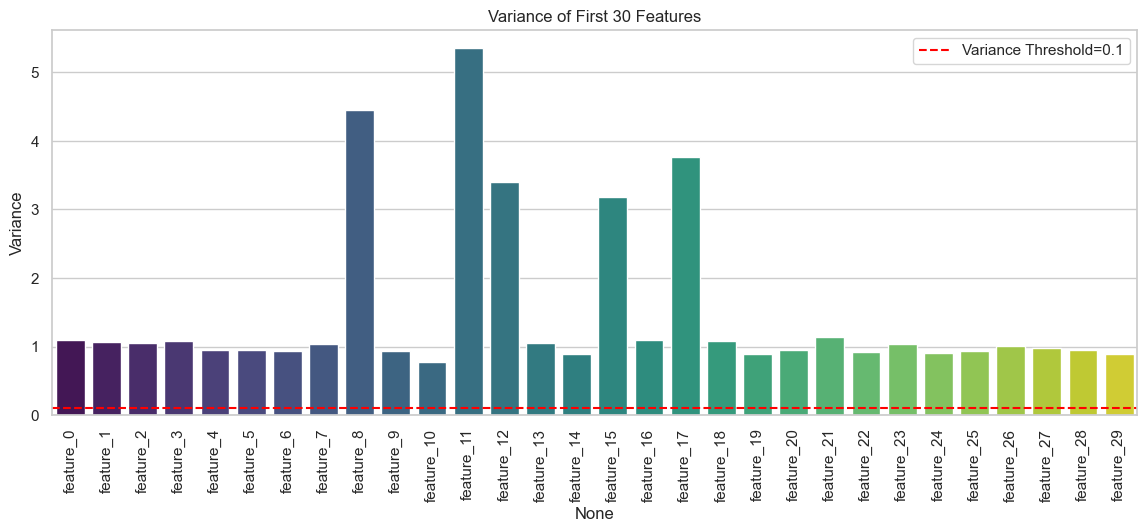

In [10]:
# Calculate variance per feature
variances = df_X_loaded.var()

# Plot variance bar chart for first 30 features (for clarity)
plt.figure(figsize=(14,5))
sns.barplot(x=variances.index[:30], y=variances.values[:30], palette='viridis')
plt.axhline(0.1, color='red', linestyle='--', label='Variance Threshold=0.1')
plt.xticks(rotation=90)
plt.title('Variance of First 30 Features')
plt.ylabel('Variance')
plt.legend()
plt.show()


In [11]:
sel_var = VarianceThreshold(threshold=0.1)
X_var = sel_var.fit_transform(df_X_loaded)

print(f"After VarianceThreshold: {X_var.shape}")


After VarianceThreshold: (200, 100)


In [12]:
sel_k = SelectKBest(score_func=f_classif, k=20)
X_k = sel_k.fit_transform(X_var, df_y_loaded)

print(f"After SelectKBest (k=20): {X_k.shape}")
print("Top 20 feature indices (relative to previous selection):", sel_k.get_support(indices=True))


After SelectKBest (k=20): (200, 20)
Top 20 feature indices (relative to previous selection): [ 8 11 12 17 19 25 26 30 39 41 42 44 58 60 62 63 64 67 82 98]


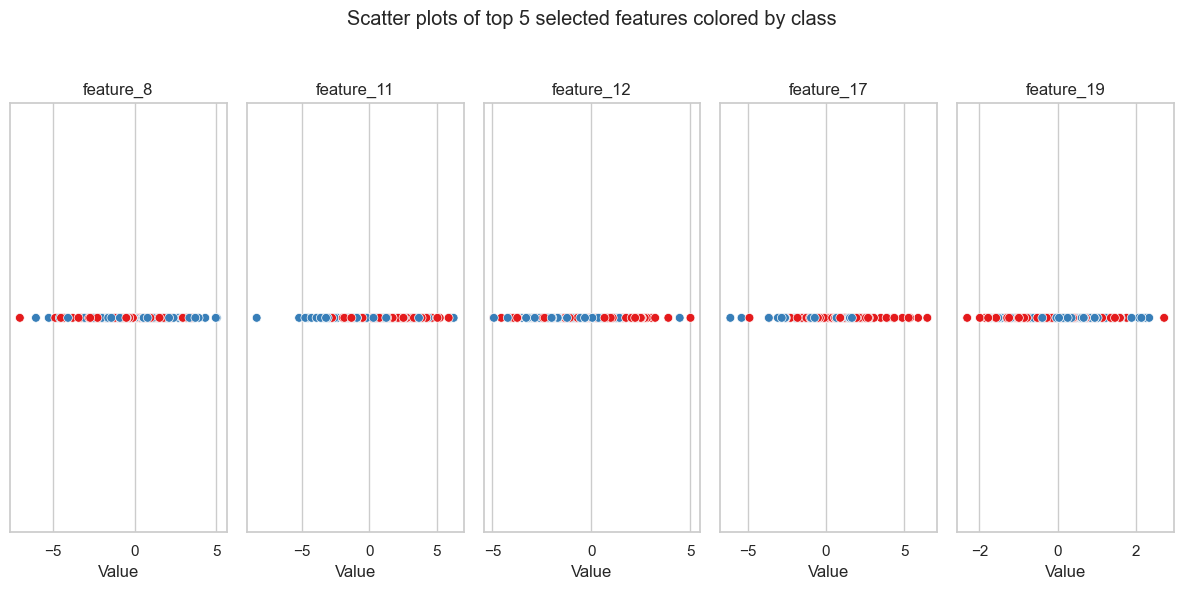

In [13]:
# Prepare DataFrame of selected features
selected_features_idx = sel_k.get_support(indices=True)
df_selected = pd.DataFrame(X_var[:, selected_features_idx], columns=[f'feature_{i}' for i in selected_features_idx])
df_selected['target'] = df_y_loaded.values

# Plot scatter for first 5 selected features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df_selected.columns[:-1][:5]):
    plt.subplot(1,5,i+1)
    sns.scatterplot(x=df_selected[feature], y=[0]*len(df_selected), hue=df_selected['target'], palette='Set1', s=40)
    plt.title(feature)
    plt.yticks([])
    plt.xlabel('Value')
    plt.legend([],[], frameon=False)

plt.suptitle('Scatter plots of top 5 selected features colored by class')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [14]:
lr = LogisticRegression(max_iter=500, solver='liblinear')
sel_rfe = RFE(lr, n_features_to_select=5, step=0.1)
sel_rfe.fit(X_k, df_y_loaded)

print("RFE selected indices (relative to SelectKBest subset):", sel_rfe.get_support(indices=True))


RFE selected indices (relative to SelectKBest subset): [ 0  1  4  8 14]
